## CSDCO File Assay
Beginning of a notebook to review the files available in CSDCO holdings

ToDo
* How to make the notebook more readable by hiding as much of the code away in something like a library

#### Breakdown globally

[[''], [u'.pdf'], [u'.jpg'], [u'.tif'], [u'.TIF'], [u'.xls'], [u'.csv'], [u'.cml'], [u'.xlsx'], [u'.BMP'], [u'.doc'], [u'.bmp'], [u'.JPG'], [u'.bMP'], [u'.PDF'], [u'.tiff']]


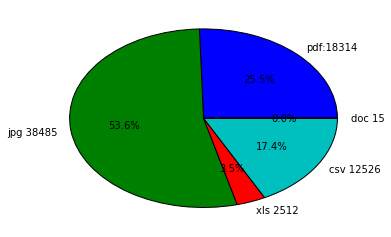

In [65]:
from SPARQLWrapper import SPARQLWrapper, JSON
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import *
import warnings
import os
warnings.filterwarnings('ignore')


sparql = SPARQLWrapper("http://localhost:9999/blazegraph/namespace/ocdfx/sparql")
sparql.setQuery("""
SELECT ?uuid ?name ?location
WHERE 
{ 
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/fileuuid> ?uuid .
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/name> ?name .
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/FileLocation> ?location .
 }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

resultset = []
resultset.append(["UUID", "Name", "Location"])

for result in results["results"]["bindings"]:
    resultset.append([result["uuid"]["value"],result["name"]["value"],result["location"]["value"]])
   
# get all the extensions
extensions = []
for location in resultset:
    filename, file_extension = os.path.splitext(location[2])
    #print(filename)
    extensions.append([file_extension])
    
used = []
unique = [x for x in extensions if x not in used and (used.append(x) or True)]

print(unique)


# count some extensions and plot the results
pdf,jpg,xls,csv,doc = 0,0,0,0,0
for name in resultset:
    if name[1].endswith('.pdf') or name[1].endswith('.PDF'):
        pdf = pdf +1
    if name[1].endswith('.jpg') or name[1].endswith('.JPG'):
        jpg = jpg +1
    if name[1].endswith('.xls') or name[1].endswith('.xlsx'):
        xls = xls +1
    if name[1].endswith('.csv'):
        csv = csv +1
    if name[1].endswith('.doc'):
        doc = doc +1


n = (pdf,jpg,xls,csv,doc)
labels =["pdf:" + str(pdf),"jpg " + str(jpg),"xls " + str(xls),"csv " + str(csv),"doc " + str(doc)]
_ = plt.pie(n,labels=labels, autopct='%1.1f%%')
#print(agemodel)

##### Project level breakdown

In [29]:
# Call on a specific project and review the available files
# Would be cool to break it down and also provide links to each file too for someone to click on

sparql = SPARQLWrapper("http://localhost:9999/blazegraph/namespace/ocdfx/sparql")
sparql.setQuery("""
SELECT ?name ?uuid
WHERE 
{ 
  ?uri  <http://opencoredata.org/id/voc/csdco/v1/ProjectName> "OHIO" .
  ?uri <http://opencoredata.org/id/voc/csdco/v1/name> ?name .
  ?uri <http://opencoredata.org/id/voc/csdco/v1/fileuuid> ?uuid .
  }
  LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

resultset = []
resultset.append(["p", "o"])

for result in results["results"]["bindings"]:
    resultset.append([result["name"]["value"],result["uuid"]["value"]])
   
# Can I put this in a panda data frame and do better searches and counting?
# import pandas as pd
# is there something like ext parser in Go in Python?

for item in resultset:
    print(item[0])   # parse out the extension and place into a count, then plot



p
OHIO-BONT14-1C-15L-1-W.pdf
OHIO-15114-1B-9L-1-W_Darker.jpg
OHIO-BONT14-1C-9L-1-W.pdf
OHIO-15114-1B-12L-1-W.jpg
OHIO-15114-1B-2L-1-W.jpg
OHIO-15114-1D-1L-1-W.jpg
OHIO-BONT14-1A-14L-1-W.jpg
OHIO-BONT14-1A-6L-1-W.jpg
OHIO-15114-1C-9L-1-W.pdf
OHIO-BONT14-1A-10L-1-W.jpg


#### Index search

Make a call to the free text index to see what results look like here.
make a call to http://localhost:9800/ocdsearchapi/csdco/_search that needs to be POST  (?)

* Do I have the lat long for these?   I could map plot the results

If post is required the following is used

```
{"size":50,"from":0,"query":{"conjuncts":[{"boost":1,"query":"Core image"}]},"fields":["*"],"highlight":{"fields":["content"]}, "facets":{"Types":{"field":"opencore:site","size":5}}}
```